# Auxiliar

## Pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer



## Funções

In [2]:
###############################
###### Find to Clean rows #####
###############################

def find_to_clean_rows(max_null, data_frame):
    linhas=[]
    
    for i in range(len(data_frame.index)) :
        
        if(data_frame.iloc[i].isnull().sum()>= max_null ):
        
            print("Row ", i , " : " ,  data_frame.iloc[i].isnull().sum(), "NaN")
            
            linhas.append(i)
    return(linhas)
            

In [3]:
#####################
###### Fill NaN #####
#####################

def Fill_NaN(data_frame):
    
    newdf = data_frame.select_dtypes(include='number')
    
    for i in newdf:
        data_frame[i] = data_frame[i].transform(lambda x: x.fillna(x.mean()))


In [4]:
#################################
###### Top ABS Correlations #####
#################################


def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [5]:
########################
###### Normalizador ####
########################
def normalizador(dados):

  for j in range(dados.shape[1]):
    menor = min(dados.iloc[:,j]) 
    maior = max(dados.iloc[:,j])
    dif = maior - menor
    if dif==0:
        dif=1 
        
    for i in range(dados.shape[0]):
      dados.iloc[i,j] = (dados.iloc[i,j]-menor)/ dif

  return(dados) 

In [6]:
##########################
###### Elbow K-means #####
##########################

def elbow_kmeans(dados,n_maximo_clusters):

    wcss=[]

    for i in range(1,n_maximo_clusters): 
         wcss.append(KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 ).fit(dados).inertia_)

    plt.plot(range(1,n_maximo_clusters),wcss)
    plt.title('Gráfico do cotovelo')
    plt.xlabel('Quantidade de clusters')
    plt.ylabel('WCSS')
    plt.show()

In [7]:
#########################
###### Plot K-means #####
#########################

def doKmeans(X, model):
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

def Plot_Kmeans (dados, modelo_kmeans):

    doKmeans(dados, modelo_kmeans)

    clust_labels, cent = doKmeans(dados, modelo_kmeans)
    kmeans = pd.DataFrame(clust_labels)
    dados.insert((dados.shape[1]),'kmeans',kmeans)
    
    #Plot the clusters obtained using k means

    for i in range(dados.shape[1]):
        for j in range(i-1):
            fig = plt.figure()
            ax = fig.add_subplot(111)
            scatter = ax.scatter(dados.iloc[:,i],dados.iloc[:,j+1],
                                 c=kmeans[0],s=50)
            ax.set_title('K-Means Clustering')
            ax.set_xlabel(dados.columns[i])
            ax.set_ylabel(dados.columns[j+1])
            plt.colorbar(scatter)

In [8]:
#########################
###### Silhouette #####
#########################



def calculate_silhouette(n_clusters, X, cluster_labels):
  silhouette_avg = silhouette_score(X, cluster_labels)
  sample_silhouette_values = silhouette_samples(X, cluster_labels)
  
  y_lower = 10
  for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
  plt.title("Silhueta")
  plt.xlabel("Valores da silhueta")
  plt.ylabel("Cluster")

  # The vertical line for average silhouette score of all the values
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")
  plt.text(silhouette_avg, 0.5, "%.2f" % silhouette_avg, color='red')

  plt.yticks([])  # Clear the yaxis labels / ticks
  plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

  return silhouette_avg, sample_silhouette_values

# 1 - Entendimento do problema: 

Identifique, defina e motive o problema que você está abordando.
Como uma solução de mineração de dados resolverá este problema?

Dataset retirado do UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Air+quality
    
O problema proposto é a análise dos dados de sensores químicos da qualidade do ar, a fim de verificar o comportamento dos poluentes nesta área classificada como significamente poluída dentro de uma cidade Italina. 

# 2 - Entendimento dos dados:

## Limpeza dos dados

In [9]:
df = pd.read_csv("AirQualityUCI.csv", sep=';',date_parser='/',decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Dia_da_semana
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,Quarta-feira
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,Quarta-feira
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,Quarta-feira
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,Quarta-feira
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,Quarta-feira


A coluna date foi separada em dia, mês e ano, a fim de trazer mais informações. Por exemplo, se há maior concentração de poluentes em um mês específico, ou se no início dos meses ocorrem maiores poluiçoes de carros.

A coluna de hora precisou ser tratada.

In [10]:
df['Hora'] = df['Time'].str.split(':', expand=True)[0].astype(int)
df['Dia'] = df['Date'].str.split('/', expand=True)[0].astype(int)
df['Mes'] = df['Date'].str.split('/', expand=True)[1].astype(int)
df['Ano'] = df['Date'].str.split('/', expand=True)[2].astype(int)
df = df.drop(["Time","Date"], axis=1)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Dia_da_semana,Hora,Dia,Mes,Ano
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,Quarta-feira,18,10,3,2004
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,Quarta-feira,19,10,3,2004
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,Quarta-feira,20,10,3,2004
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,Quarta-feira,21,10,3,2004
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,Quarta-feira,22,10,3,2004


Não possui dados nulos, mas os dados que houveram erro de leitura, retornam como -200.

In [11]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
 13  Dia_da_semana  9357 non-null   object 
 14  Hora           9357 non-null   int32  
 15  Dia            9357 non-null   int32  
 16  Mes            9357 non-null   int32  
 17  Ano            9357 non-null   int32  
dtypes: float

Apenas 914 registros do dataset com informações de NMHC foram recolhidas de forma correta. Logo, esta coluna sera desconsiderada na análise.

Considerando que temos 10 colunas float, se o aparelho não funcionou para captar 80% dos poluentes, isto é aproximadamente 10 features, é uma boa ideia apagar esses registros.

In [13]:
linhas_apagar = find_to_clean_rows(10,df)

Row  705  :  11 NaN
Row  1825  :  13 NaN
Row  1826  :  13 NaN
Row  1827  :  13 NaN
Row  1828  :  13 NaN
Row  1829  :  13 NaN
Row  1830  :  13 NaN
Row  1831  :  13 NaN
Row  1832  :  13 NaN
Row  1833  :  13 NaN
Row  1834  :  13 NaN
Row  1835  :  13 NaN
Row  1836  :  13 NaN
Row  1837  :  13 NaN
Row  1838  :  13 NaN
Row  2420  :  10 NaN
Row  2421  :  10 NaN
Row  2422  :  10 NaN
Row  2423  :  10 NaN
Row  2424  :  10 NaN
Row  2425  :  10 NaN
Row  2426  :  10 NaN
Row  2427  :  10 NaN
Row  2428  :  10 NaN
Row  2429  :  10 NaN
Row  2430  :  10 NaN
Row  2431  :  10 NaN
Row  2432  :  10 NaN
Row  2433  :  12 NaN
Row  2434  :  11 NaN
Row  2435  :  10 NaN
Row  2436  :  10 NaN
Row  2437  :  10 NaN
Row  2438  :  10 NaN
Row  2439  :  10 NaN
Row  2440  :  10 NaN
Row  2441  :  10 NaN
Row  2442  :  10 NaN
Row  2443  :  10 NaN
Row  2444  :  10 NaN
Row  2445  :  10 NaN
Row  2446  :  10 NaN
Row  2447  :  10 NaN
Row  2448  :  10 NaN
Row  2449  :  10 NaN
Row  2450  :  10 NaN
Row  2451  :  10 NaN
Row  2452  :  

In [14]:
df = df.drop(df.index[linhas_apagar])
df = df.drop('NMHC(GT)', axis=1)
Fill_NaN(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9017 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9017 non-null   float64
 1   PT08.S1(CO)    9017 non-null   float64
 2   C6H6(GT)       9017 non-null   float64
 3   PT08.S2(NMHC)  9017 non-null   float64
 4   NOx(GT)        9017 non-null   float64
 5   PT08.S3(NOx)   9017 non-null   float64
 6   NO2(GT)        9017 non-null   float64
 7   PT08.S4(NO2)   9017 non-null   float64
 8   PT08.S5(O3)    9017 non-null   float64
 9   T              9017 non-null   float64
 10  RH             9017 non-null   float64
 11  AH             9017 non-null   float64
 12  Dia_da_semana  9017 non-null   object 
 13  Hora           9017 non-null   int32  
 14  Dia            9017 non-null   int32  
 15  Mes            9017 non-null   int32  
 16  Ano            9017 non-null   int32  
dtypes: float64(12), int32(4), object(1)
memory usage: 1.

## (a) Descreva os dados (e fontes de dados) que darão suporte à mineração de dados para solucionar o problema. O que significa cada atributo?


Informação de Atributo:

- Data -> data em que foi realizada a mensuração
- Hora -> hora em que foi realizada a mensuração
- Concentração média horária real de CO em mg / m^3 (analisador de referência)

O monóxido de carbono (CO) é um gás inodoro e muito perigoso pois realiza ligações estáveis com a hemoglobina, sendo tóxico para o corpo.Formado por combustão.

- PT08.S1 (óxido de estanho) média de resposta horária do sensor (nominalmente CO direcionado)

- Concentração de hidrocarbonetos não metânicos em média horária real em microg / m^3 (analisador de referência)

São compostos muito reativos que interferem no ciclo global do carbono, produzidos naturalmente pelas florestas, principalmente por pinheiro, mas também esses gases são produzidos na combustão incompleta dos combustíveis, como a gasolina, o gás natural e o GLP.

- Concentração de benzeno média horária real em microg / m^3 (analisador de referência)

Produzidos quando materiais ricos em carbono passam por combustão incompleta, podendo ser originário de incêndios e vulcões.

- PT08.S2 (titânia) com média de resposta horária do sensor (nominalmente direcionada ao NMHC)

- Concentração de NOx média horária verdadeira em ppb (analisador de referência)

NOx ou óxidos de nitrogênio são um ramo de gases tóxicos altamente reativos. Os gases de óxido de nitrogênio estimulam a formação de smog e chuva ácida, além de desempenhar um papel na influência do ozônio troposférico.

- PT08.S3 (óxido de tungstênio) resposta média horária do sensor  (nominalmente direcionado a NOx)
- Concentração de NO2 média horária em microg / m^3 (analisador de referência)

Processos de combustão tendem a emitir baixas concentrações de NO2 em relação aos valores de NO, mas ao entrar em contato com o oxigênio do ar, as moléculas de NO logo se convertem em NO2 e, por este motivo, as taxas de emissão são sempre calculadas considerando ambos os compostos como sendo apenas NO2. Atinge os revestimentos celulares das vias respiratórias, indo desde o nariz até os alvéolos pulmonares. Em casos de intoxicação grave, pode ainda causar hemorragias, insuficiência respiratória e até a morte.

- PT08.S4 (óxido de tungstênio) resposta média horária do sensor (nominalmente direcionado para NO2)
- PT08.S5 (óxido de índio) resposta média horária do sensor (nominalmente O3 direcionado)
- Temperatura em °C
- Umidade Relativa (%)
- Umidade Absoluta
- Dia da semana: O dia é dado como um inteiro, variando de 1 (domingo) a 7 (sábado), por padrão.

Foi utilizada a funcionalidade do Excel para nos trazer o dia da semana, pois a credita-se que pode ser um informação importante.


## (b) Indique a média, mínimo e máximo de cada atributo. Observe se há algum valor discrepante que possa prejudicar a análise.


In [16]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hora,Dia,Mes,Ano
count,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2.130814,1099.833166,10.083105,939.153376,241.952439,835.493605,112.136811,1456.264598,1022.906128,18.317829,49.234201,1.02553,11.481757,15.918598,6.321060,2004.233892
std,1.297294,216.766808,7.439070,266.446412,186.905549,256.446753,43.139916,345.707244,397.909306,8.819372,17.291906,0.40323,6.912314,8.837487,3.405225,0.423327
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.18470,0.000000,1.000000,1.000000,2004.000000
25%,1.200000,937.000000,4.400000,735.000000,112.000000,658.000000,85.000000,1228.000000,733.000000,11.800000,35.900000,0.73750,5.000000,8.000000,3.000000,2004.000000
50%,2.130814,1064.000000,8.300000,910.000000,227.000000,806.000000,112.136811,1462.000000,965.000000,17.800000,49.500000,0.99680,11.000000,16.000000,6.000000,2004.000000
75%,2.600000,1230.000000,14.000000,1116.000000,280.000000,969.000000,132.000000,1673.000000,1273.000000,24.400000,62.400000,1.31260,17.000000,23.000000,9.000000,2004.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.23100,23.000000,31.000000,12.000000,2005.000000


## (c) Faca um plot da distribuição de cada atributo. A distribuição está compatível com o esperado para cada atributo?


plt.figure(figsize=(20,20))
tamanho = len(df.columns)
colunas = 3
linhas = int(tamanho/4)+1
cont=1
for i in df.columns:

    plt.subplot(linhas,colunas,cont)
    sns.boxplot(df[i])
    
    cont=cont+1

Sim, há valores discrepantes, mas provavelmente eles são importantes à análise.

## (d) Verifique se há dados faltantes e complete-os.


Sim, há dados ausentes, eles estão caracterizados como -200.

Foram tratados no início do trabalho.


## (e) O dado é categórico?

Apenas dia da semana.
É necessário transformar em variáveis Dummies

In [17]:
df = pd.get_dummies(df, columns = ["Dia_da_semana"], drop_first = False)
df

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,...,Dia,Mes,Ano,Dia_da_semana_Domingo,Dia_da_semana_Quarta-feira,Dia_da_semana_Quinta-feira,Dia_da_semana_Segunda-feira,Dia_da_semana_Sexta-feira,Dia_da_semana_Sábado,Dia_da_semana_Terça-feira
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,...,10,3,2004,0,1,0,0,0,0,0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,...,10,3,2004,0,1,0,0,0,0,0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,...,10,3,2004,0,1,0,0,0,0,0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,...,10,3,2004,0,1,0,0,0,0,0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,...,10,3,2004,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,...,4,4,2005,0,0,0,1,0,0,0
9353,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,...,4,4,2005,0,0,0,1,0,0,0
9354,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,...,4,4,2005,0,0,0,1,0,0,0
9355,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,...,4,4,2005,0,0,0,1,0,0,0


## (f) (Extra) Faça um plot com as correlações entre os atributos. Quais são os maiores pares de atributo correlacionados? Se possuir atributos altamente correlacionados (normalmente > 0:9) é uma boa prática remover um deles e manter o outro. 
Veja mais porque em: https://stats.stackexchange.com/questions/50537/should-one-remove-highly-correlated-variables-before-doing-pca

<AxesSubplot:>

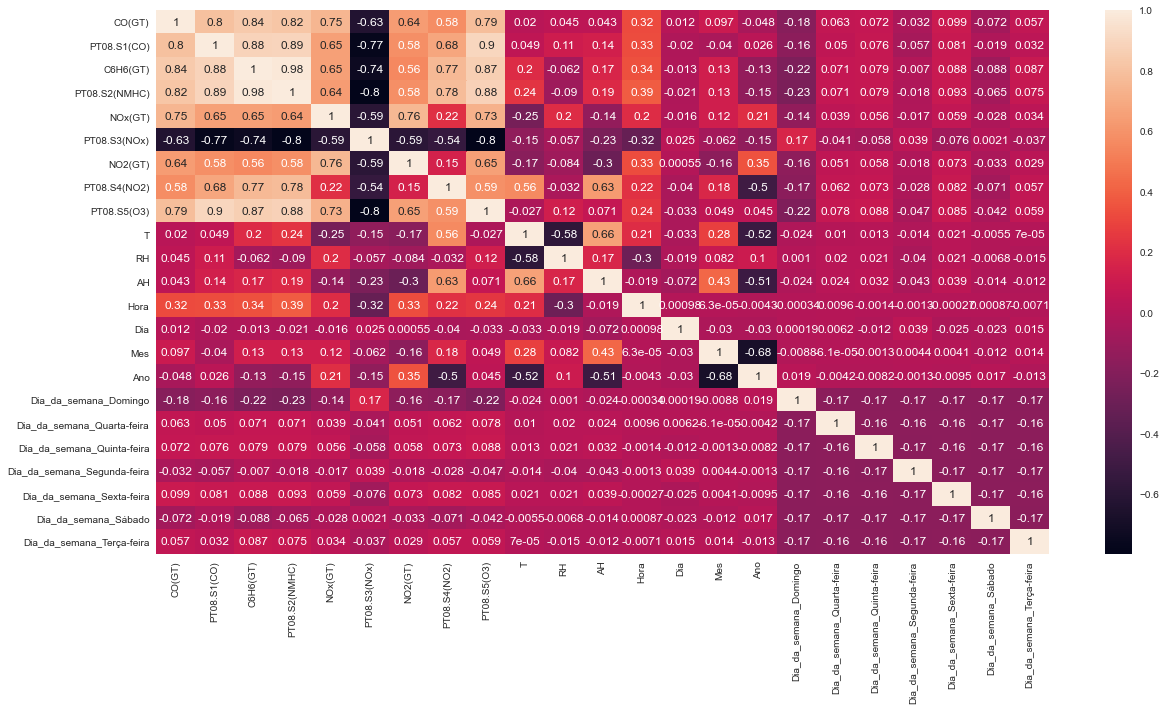

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [19]:
print(get_top_abs_correlations(df, 10))

C6H6(GT)       PT08.S2(NMHC)    0.981950
PT08.S1(CO)    PT08.S5(O3)      0.899324
               PT08.S2(NMHC)    0.892964
               C6H6(GT)         0.883795
PT08.S2(NMHC)  PT08.S5(O3)      0.880578
C6H6(GT)       PT08.S5(O3)      0.865689
CO(GT)         C6H6(GT)         0.839869
               PT08.S2(NMHC)    0.822584
               PT08.S1(CO)      0.799926
PT08.S2(NMHC)  PT08.S3(NOx)     0.796703
dtype: float64


In [20]:
df = df.drop('PT08.S2(NMHC)', axis=1)

PT08.S2(NMHC) Possui forte correlação com várias outras features.

## (g) (Extra) O dado possui outliers? Se possuir, é uma boa prática removê-los para melhorar a análise.
Veja: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

No momento não.

# 3. Preparação dos dados:



## (a) Especifique quais pré-processamentos são necessários para a análise (pense nos dados faltantes, nos dados categóricos e nos outliers). Justifique.


Os dados faltantes foram caracterizados como -200. Foram tratados anteriomente.
É interessante incluir os dias da semana como dados categóricos, acredito que trará informações importantes.
Já foram tratados para dummies.

## (b) Se for aplicável nos seus dados, inclua codições de dados categóricos. Justifique.


## (c) Se for aplicável, faça normalização nos dados. Justifique. Qual normalização você utilizou?

Os dados estão em escalas muito distintas, a aplicação de métodos por distância serão muito impactadas.

Fazendo a normalização, vamos colocar tudo na escala 0-1, tornando possível a comparação ee análise de distância entre features.

In [21]:
df_norm = normalizador(df)
df_norm

,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,...,Dia,Mes,Ano,Dia_da_semana_Domingo,Dia_da_semana_Quarta-feira,Dia_da_semana_Quinta-feira,Dia_da_semana_Segunda-feira,Dia_da_semana_Sexta-feira,Dia_da_semana_Sábado,Dia_da_semana_Terça-feira
0,0.211864,0.511845,0.185535,0.111036,0.310885,0.335347,0.513040,0.454822,0.333333,0.499371,...,0.3,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.161017,0.463029,0.146226,0.068382,0.360864,0.271903,0.453237,0.326238,0.326882,0.484277,...,0.3,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.177966,0.541996,0.139937,0.087339,0.346463,0.338369,0.451439,0.370547,0.296774,0.563522,...,0.3,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.177966,0.523331,0.143082,0.115098,0.326133,0.362538,0.464478,0.426586,0.277419,0.638994,...,0.3,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.127119,0.448672,0.100629,0.087339,0.373994,0.344411,0.422212,0.386186,0.281720,0.633962,...,0.3,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.254237,0.478823,0.210692,0.318213,0.091910,0.567976,0.370054,0.655083,0.511828,0.252830,...,0.1,0.272727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9353,0.194915,0.370424,0.177673,0.237644,0.119441,0.534743,0.320594,0.455256,0.563441,0.182390,...,0.1,0.272727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9354,0.194915,0.355348,0.193396,0.197021,0.119017,0.522659,0.310252,0.378367,0.619355,0.114465,...,0.1,0.272727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9355,0.169492,0.255564,0.147799,0.157752,0.160949,0.465257,0.220324,0.238488,0.649462,0.054088,...,0.1,0.272727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0



## (d) Façaa a redução de dimensionalidade. Qual o método de redução você utilizou? Quantas componentes você escolheu? Justifique.

In [22]:
pca = PCA()
for i in range(1,22):
    pca = PCA(n_components=i)
    pca.fit(df_norm)
    print(f'{i} componentes')
    print(f'Variância acumulada: {sum(pca.explained_variance_ratio_):.2f}')

1 componentes
Variância acumulada: 0.17
2 componentes
Variância acumulada: 0.28
3 componentes
Variância acumulada: 0.37
4 componentes
Variância acumulada: 0.46
5 componentes
Variância acumulada: 0.55
6 componentes
Variância acumulada: 0.64
7 componentes
Variância acumulada: 0.73
8 componentes
Variância acumulada: 0.80
9 componentes
Variância acumulada: 0.86
10 componentes
Variância acumulada: 0.91
11 componentes
Variância acumulada: 0.94
12 componentes
Variância acumulada: 0.97
13 componentes
Variância acumulada: 0.99
14 componentes
Variância acumulada: 0.99
15 componentes
Variância acumulada: 0.99
16 componentes
Variância acumulada: 1.00
17 componentes
Variância acumulada: 1.00
18 componentes
Variância acumulada: 1.00
19 componentes
Variância acumulada: 1.00
20 componentes
Variância acumulada: 1.00
21 componentes
Variância acumulada: 1.00


Com 9 componentes 0.86 já é explicada.

In [23]:
pca.explained_variance_

array([0.26865942, 0.16615837, 0.14696165, 0.14498915, 0.14177682,
       0.14093964, 0.13929276, 0.11967299, 0.08770447, 0.0803495 ,
       0.05438045, 0.03667292, 0.032581  , 0.00670102, 0.00420797,
       0.00233692, 0.00191191, 0.00173724, 0.00159827, 0.00131434,
       0.00030324])

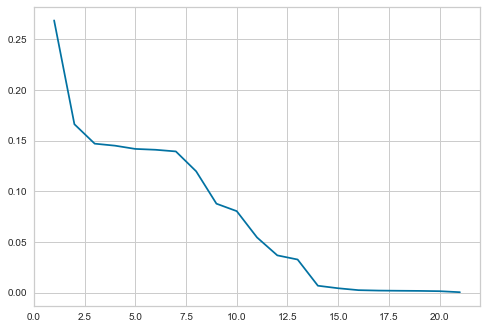

In [24]:
plt.plot(range(1, 22), pca.explained_variance_)

O cotovelo ocorre na 3º componente. Mas apenas 0.37 da variância é explicada.

Já que com 9 componentes 0.86 da variância é explicada, e é onde ocorre o segundo cotovelo, vamos adotar 9 componentes.

In [25]:
principalComponents = pca.fit_transform(df_norm)
N_COMPONENTS = 9
pca_cols = ["PC%d" %i for i in range(1, N_COMPONENTS+1)]
df_pca = pd.DataFrame(principalComponents[:,:N_COMPONENTS], columns=pca_cols)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.032307,-0.341568,-0.071781,-0.104169,0.013224,0.184293,0.868727,0.071004,0.086824
1,-0.020122,-0.251906,-0.069822,-0.098118,0.013525,0.181510,0.867336,0.027821,0.048250
2,-0.009962,-0.311166,-0.070566,-0.104725,0.011726,0.184859,0.869787,0.075573,0.074674
3,-0.008228,-0.347247,-0.071230,-0.109401,0.010360,0.187072,0.871904,0.104339,0.095088
4,-0.001605,-0.289822,-0.069803,-0.105559,0.010257,0.185495,0.871730,0.081916,0.069119
...,...,...,...,...,...,...,...,...,...
9012,0.734381,-0.207916,-0.299348,0.810115,-0.132462,0.045516,-0.067949,0.316138,0.505572
9013,0.733809,-0.090074,-0.296843,0.820786,-0.131433,0.042077,-0.069994,0.272319,0.440475
9014,0.725654,-0.069386,-0.296572,0.826161,-0.130243,0.041801,-0.069542,0.301668,0.403509
9015,0.744985,0.035056,-0.294913,0.836738,-0.128286,0.037993,-0.071430,0.261204,0.345214


# 4. Modelagem: escolha dois algoritmos de clusterização a serem utilizados
(nossa sugestão é utilizar K-Means e Clusterização Hierárquica, mas fique a vontade para utilizar outros de sua escolha). Quais
parâmetros podem ser variados nesses algoritmos afim de se obter o melhor resultado?

## K-means

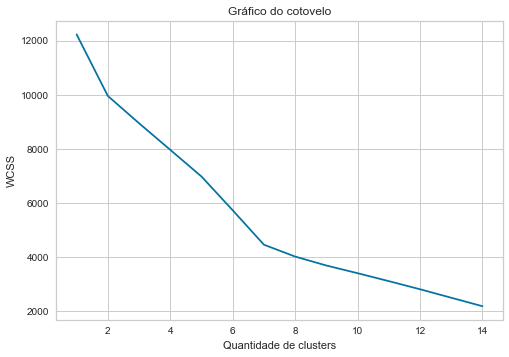

In [26]:
elbow_kmeans(df_pca,15)

O primeiro cotovelo ocorreu com 2 clusters, e o segundo com 7 clusters. Vamos testar com os dois.

In [27]:
Clust_kmeans_2 = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=100,random_state=42 )
Clust_kmeans_2.fit(df_pca)
Clust_kmeans2_labels = Clust_kmeans_2.predict(df_pca)

In [28]:
Clust_kmeans_7 = KMeans(n_clusters=7, init ='k-means++', max_iter=300, n_init=100,random_state=42 )
Clust_kmeans_7.fit(df_pca)
Clust_kmeans7_labels = Clust_kmeans_7.predict(df_pca)

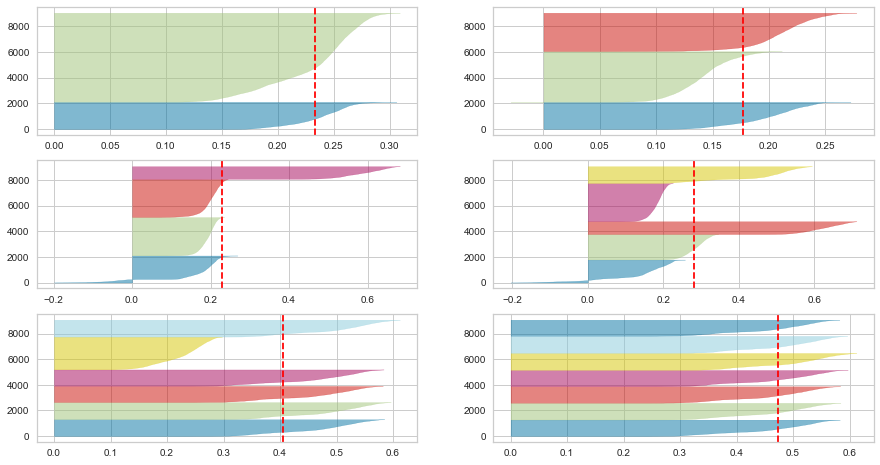

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca)

Pela análise da silhueta, 7 clusters é o mais indicado.

## Hierárquico

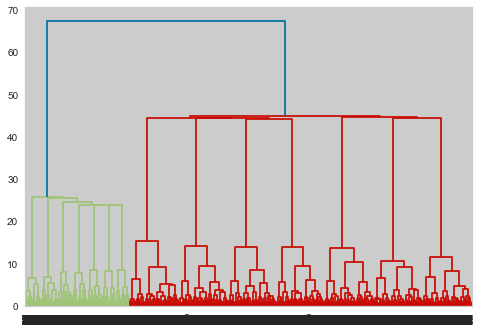

In [30]:
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'))

In [32]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df_pca)
Clust_hierarquico_labels = model.labels_

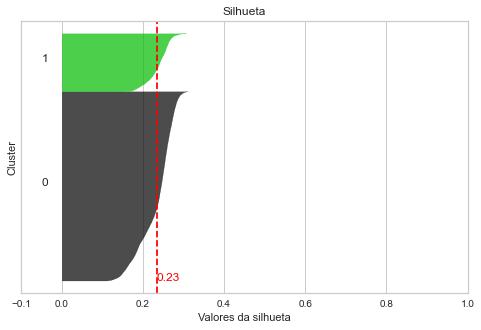

Silhueta média = 0.23


In [33]:
fig = plt.figure(figsize=(8,5))
silhouette_avg, sample_silhouette_values = calculate_silhouette(2, df_pca, Clust_hierarquico_labels)
print("Silhueta média = %.2f" % silhouette_avg)

É indicada a escolha de dois clusters

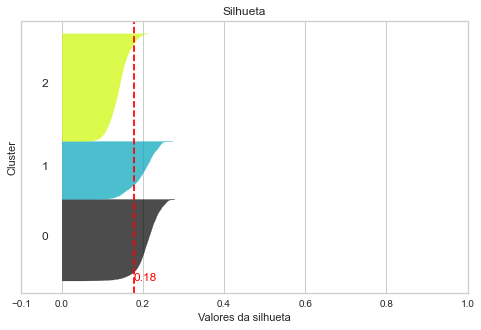

Silhueta média = 0.18


In [36]:
model3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model3.fit(df_pca)
Clust_hierarquico_labels3 = model3.labels_
fig = plt.figure(figsize=(8,5))
silhouette_avg, sample_silhouette_values = calculate_silhouette(3, df_pca, Clust_hierarquico_labels3)
print("Silhueta média = %.2f" % silhouette_avg)

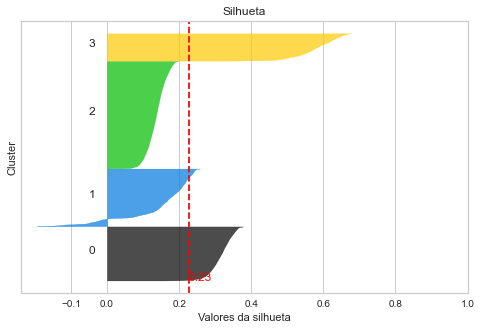

Silhueta média = 0.23


In [37]:
model4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model4.fit(df_pca)
Clust_hierarquico_labels4 = model4.labels_
fig = plt.figure(figsize=(8,5))
silhouette_avg, sample_silhouette_values = calculate_silhouette(4, df_pca, Clust_hierarquico_labels4)
print("Silhueta média = %.2f" % silhouette_avg)

# 5. Avaliação:

## (a) Defina o número de clusters apropriado para cada método. Observe que eles podem ser diferentes.

K-means o mais indicado foram 7 clusters, sendo que com 2 também seria considerado bom. Enquanto o método hierárquico foi necessário apenas 2 clusters.

Pela silhoueta média, usando o k-means com 7 clusters, foi a melhor separação.

## (b) Descreva interpretações para cada clusters (vamos ver na Aula 6). Como os atributos se diferenciam em cada cluster?

LinAlgError: singular matrix

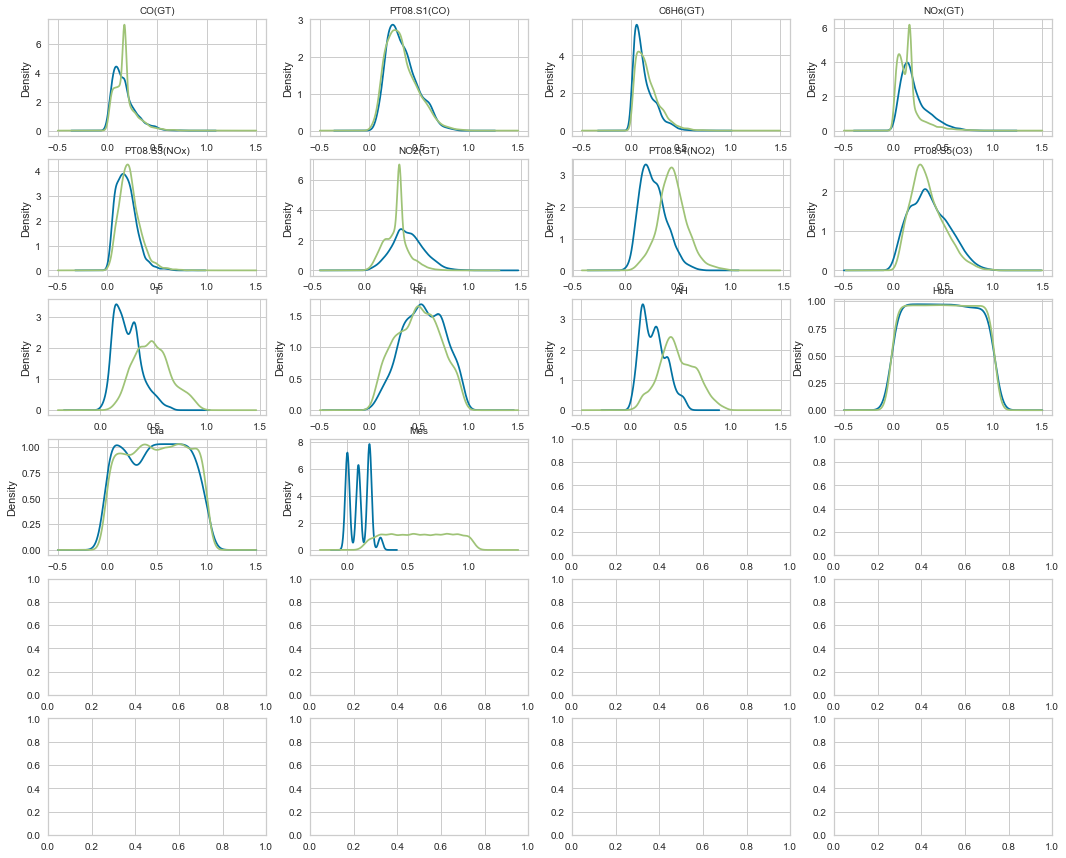

In [38]:
df_com_label_k2 = df.copy(deep=True)
df_com_label_k2['label'] = Clust_kmeans2_labels
df_grouped = df_com_label_k2.groupby('label')
cols = df.columns
fig, axs = plt.subplots(len(cols)//4+1, 4, figsize=(18,15))
for idx, col in enumerate(cols):
  row_idx = idx//4
  col_idx = idx%4
  df_grouped[col].plot.density(ax=axs[row_idx, col_idx])
  axs[row_idx, col_idx].set_title(col, fontsize=10)
plt.show()

LinAlgError: singular matrix

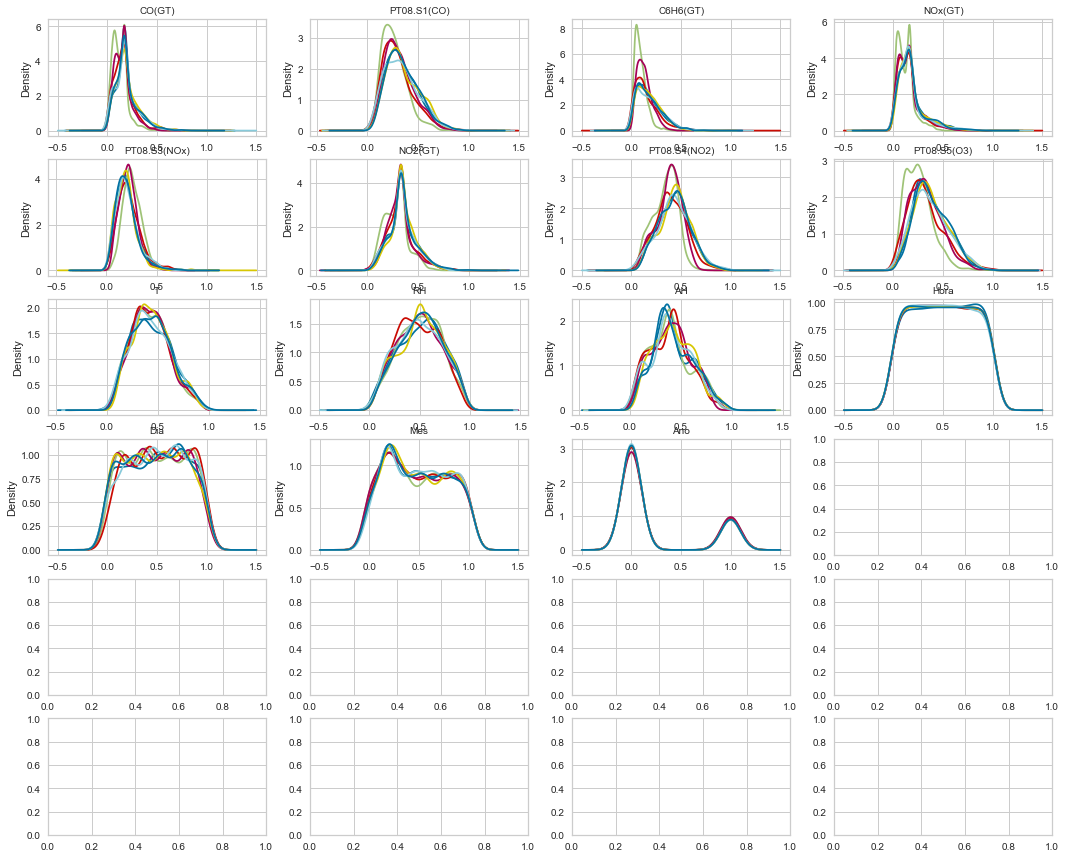

In [39]:
df_com_label_k7 = df.copy(deep=True)
df_com_label_k7['label'] = Clust_kmeans7_labels
df_grouped = df_com_label_k7.groupby('label')
cols = df.columns
fig, axs = plt.subplots(len(cols)//4+1, 4, figsize=(18,15))
for idx, col in enumerate(cols):
  row_idx = idx//4
  col_idx = idx%4
  df_grouped[col].plot.density(ax=axs[row_idx, col_idx])
  axs[row_idx, col_idx].set_title(col, fontsize=10)
plt.show()

LinAlgError: singular matrix

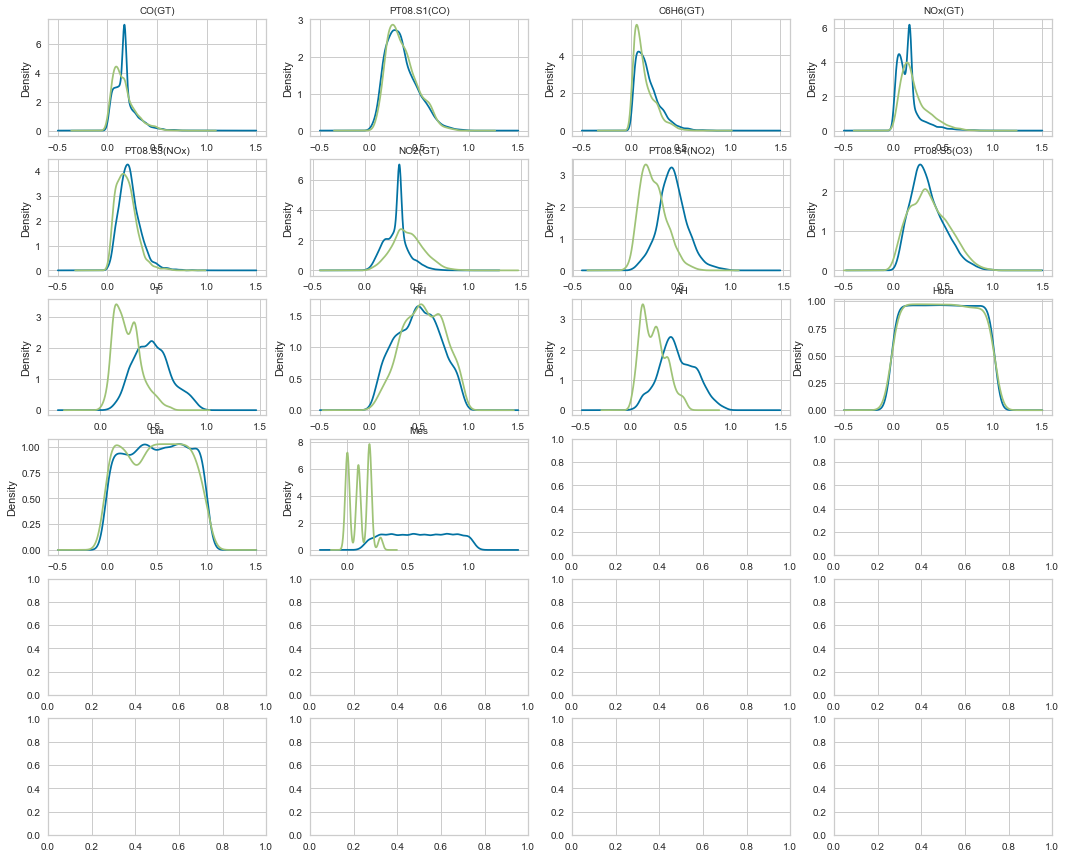

In [40]:
df_com_label_Clust_hierarquico = df.copy(deep=True)
df_com_label_Clust_hierarquico['label'] = Clust_hierarquico_labels
df_grouped = df_com_label_Clust_hierarquico.groupby('label')
cols = df.columns
fig, axs = plt.subplots(len(cols)//4+1, 4, figsize=(18,15))
for idx, col in enumerate(cols):
  row_idx = idx//4
  col_idx = idx%4
  df_grouped[col].plot.density(ax=axs[row_idx, col_idx])
  axs[row_idx, col_idx].set_title(col, fontsize=10)
plt.show()




(c) Avalie a diferenca de interpretac~ao entre os algoritmos. Existem observac~oes que mudam de
cluster entre um algoritmo e outro? Que caractersticas essas observac~oes possuem?
6. Conclus~ao: conclua sua analise. O que voc^e descobriu com a clusterizac~ao? O que voc^e faria de
diferente em uma segunda iterac~ao?
7. Relatorio: documente atraves de textos e gracos a sua analise.